# Regression Of Used Cars Price Prediction
In this notebook, we aim to predict the price of used cars based on various features such as mileage, make, model, year, and more. The dataset used comes from Kaggle and provides a rich set of features that will help us understand the dynamics influencing used car prices.
Used car price prediction is a classic regression problem with many practical applications, including online car marketplaces, dealerships, and financial institutions. Predicting accurate prices helps both sellers and buyers make informed decisions.


In this notebook, I will be predicting the price of used cars using the dataset from Kaggle.
[You can access the competition here.](https://www.kaggle.com/competitions/playground-series-s4e9/overview)

### Importing Libraries
In this section, we import the necessary libraries required for data analysis, preprocessing, modeling, and evaluation. Each library serves a distinct purpose:

- **Pandas**: For data manipulation and analysis.
- **Numpy**: For numerical computations.
- **Matplotlib & Seaborn**: For data visualization to help us better understand the relationships within the data.
- **Scikit-learn**: For building machine learning models and preprocessing data.
- **LightGBM**: A gradient boosting framework that is particularly efficient and scalable for regression tasks.

In [ ]:
# Install necessary libraries if not already installed
%pip install pandas numpy matplotlib seaborn scikit-learn lightgbm xgboost

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [338]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [339]:
# Load the data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [340]:
# inspect the data
print(train_df.columns)

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')


In [341]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [342]:
train_df['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [343]:
train_df['model'].value_counts()

model
F-150 XLT                        2945
M3 Base                          2229
Camaro 2SS                       1709
M4 Base                          1622
Mustang GT Premium               1526
                                 ... 
IONIQ Plug-In Hybrid SEL            2
X5 3.0i                             1
X5 xDrive40e                        1
XLR Base                            1
Integra w/A-Spec Tech Package       1
Name: count, Length: 1897, dtype: int64

In [344]:
train_df['model_year'].value_counts()

model_year
2021    18198
2018    16414
2020    15848
2022    15749
2019    15409
2016    13696
2017    12794
2015    11389
2023     8769
2014     8415
2013     6796
2011     6265
2012     6095
2008     5156
2007     4876
2010     4235
2005     3129
2006     2814
2009     2716
2004     2570
2003     1906
2001     1534
2002     1282
2000      558
1999      554
1998      343
1997      312
1996      189
2024      162
1993      140
1995      102
1994       92
1992       14
1974       12
Name: count, dtype: int64

In [345]:
train_df['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [346]:
train_df['engine'].value_counts()

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           2841
2.0L I4 16V GDI DOHC Turbo                             2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          2451
                                                       ... 
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid        1
184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability       1
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               1
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       1
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1117, dtype: int64

In [347]:
train_df['transmission'].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [348]:
train_df['ext_col'].value_counts()

ext_col
Black                                 48658
White                                 43815
Gray                                  25293
Silver                                16995
Blue                                  14555
                                      ...  
GT SILVER                                 5
Blue Caelum                               5
Granite Crystal Metallic Clearcoat        5
BLUE                                      3
Mango Tango Pearlcoat                     2
Name: count, Length: 319, dtype: int64

In [349]:
train_df['int_col'].value_counts()

int_col
Black           107674
Beige            24495
Gray             21204
Brown             5810
Red               5145
                 ...  
Nougat Brown         7
Classic Red          7
Cobalt Blue          6
WHITE                6
ORANGE               4
Name: count, Length: 156, dtype: int64

In [350]:
train_df['accident'].value_counts()
# binary feature

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

In [351]:
train_df['clean_title'].value_counts()
# binary feature

clean_title
Yes    167114
Name: count, dtype: int64

In [352]:
train_df['price'].describe()

count    1.885330e+05
mean     4.387802e+04
std      7.881952e+04
min      2.000000e+03
25%      1.700000e+04
50%      3.082500e+04
75%      4.990000e+04
max      2.954083e+06
Name: price, dtype: float64

### Data Preprocessing
Data preprocessing is a crucial step to ensure our data is clean and suitable for modeling. This typically involves:

- **Handling missing values**: Missing data can lead to biases or errors in model performance if not treated properly.
- **Encoding categorical variables**: Machine learning models often require numerical input, so categorical data must be converted appropriately.
- **Feature scaling**: Standardizing or normalizing features can help some models perform better, especially those that rely on distance calculations.

In [353]:
# drop the 'id' column
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [354]:
# check for missing values
train_df.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [355]:
# fill fuel_type missing values 
train_df['fuel_type'].fillna('Gasoline', inplace=True)
test_df['fuel_type'].fillna('Gasoline', inplace=True)

In [356]:
# show accident missing values
train_df['accident'].value_counts()

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

In [357]:
# turn accident into binary feature
train_df['accident'].replace({'None reported': False, 'At least 1 accident or damage reported': True}, inplace=True)
test_df['accident'].replace({'None reported': False, 'At least 1 accident or damage reported': True}, inplace=True)

In [358]:
# fill accident missing values with keeping the same distribution
false_p = train_df['accident'].value_counts()[0]/train_df['accident'].value_counts().sum()
true_p = train_df['accident'].value_counts()[1]/train_df['accident'].value_counts().sum()
train_df['accident'].fillna(np.random.choice([True, False], p=[true_p, false_p]), inplace=True)

false_p_test = test_df['accident'].value_counts()[0]/test_df['accident'].value_counts().sum()
true_p_test = test_df['accident'].value_counts()[1]/test_df['accident'].value_counts().sum()
test_df['accident'].fillna(np.random.choice([True, False], p=[true_p_test, false_p_test]), inplace=True)

In [359]:
# show clean_title missing values
train_df['clean_title'].value_counts()

clean_title
Yes    167114
Name: count, dtype: int64

In [360]:
# turn clean_title into binary feature
train_df['clean_title'].replace({'Yes': True, np.nan: False}, inplace=True)
test_df['clean_title'].replace({'Yes': True, np.nan: False}, inplace=True)

In [361]:
# check for missing values
train_df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [362]:
# use label encoding for 'brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col'
label_encoder = LabelEncoder()
encode_features = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col']

for feature in encode_features:
    train_df[feature] = label_encoder.fit_transform(train_df[feature])
    test_df[feature] = label_encoder.fit_transform(test_df[feature])

In [363]:
# use standard scaler for 'milage', 'price'
# scaler = StandardScaler()
# train_df[['milage', 'price']] = scaler.fit_transform(train_df[['milage', 'price']])
# test_df[['milage', 'price']] = scaler.fit_transform(test_df[['milage', 'price']])

In [364]:
train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,31,495,2007,213000,2,116,38,312,71,False,True,4200
1,28,930,2002,143250,2,366,38,263,10,True,True,4999
2,9,1575,2002,136731,1,640,38,38,71,False,True,13900
3,16,758,2017,19500,2,863,49,29,14,False,True,45000
4,36,1077,2021,7388,2,259,23,29,10,False,True,97500


### Data Pipeline
A data pipeline automates the transformation and preparation of raw data into a form that can be used by machine learning models. Building a pipeline helps to:

- Ensure consistency in preprocessing.
- Make the entire process reproducible.
- Simplify future data updates, as the same pipeline can be reused.

### Data Analysis & Visualization
Exploratory data analysis (EDA) helps us understand the structure of our dataset, detect patterns, and identify relationships between features. In this section, we will:

- **Visualize distributions**: To understand how different features are spread and if they contain outliers.
- **Correlation analysis**: To identify which features are most strongly related to the car prices, helping us in feature selection.
- **Uncover trends**: By visualizing relationships such as price vs. mileage or year, we can gather insights into which factors most influence car prices.

In [365]:
# scatter matrix
# sns.pairplot(train_df, diag_kind='kde')

<Axes: >

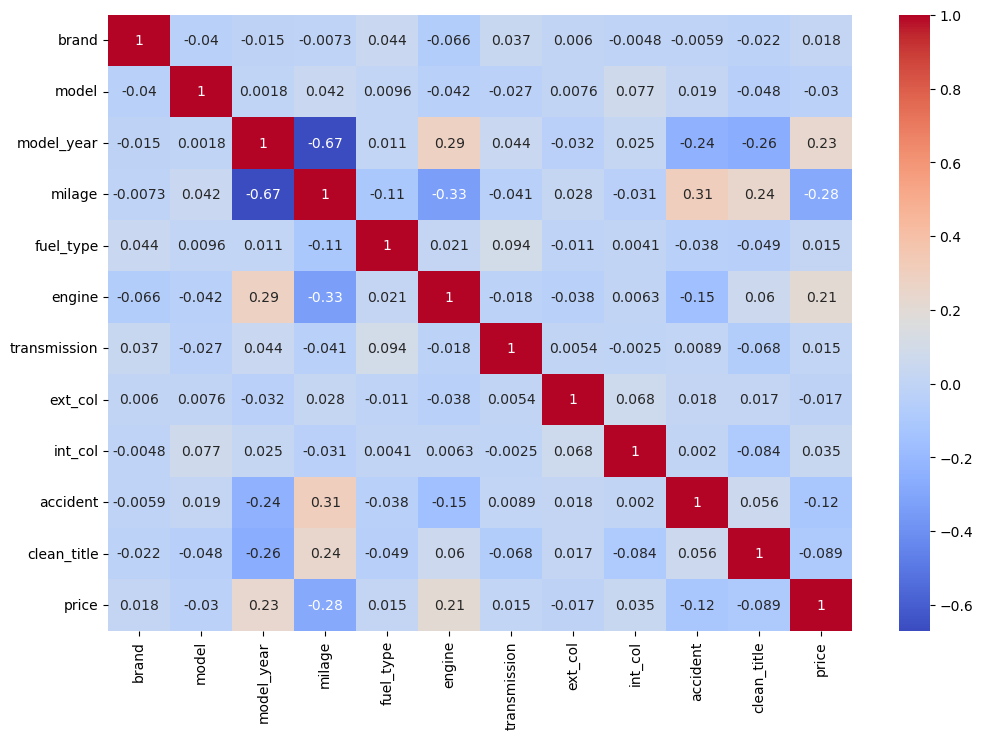

In [366]:
# correlation matrix
corr_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


### Model Building
This section involves creating and training several machine learning models. Different algorithms have different strengths, and by trying multiple models, we aim to:

- Compare performance metrics to choose the best model for predicting car prices.
- Fine-tune models using hyperparameter optimization to improve prediction accuracy.

We will start with simpler models like Linear Regression and then move to more complex models like Gradient Boosting.

In [367]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor # type: ignore
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

### LightGBM Model
will be finetuned

In [368]:
# split the data
X = train_df.drop('price', axis=1)
y = train_df['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# train a model 
# model = RandomForestRegressor(n_estimators=100, max_depth=6, min_samples_split=2, min_samples_leaf=1)
model = LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, num_leaves=31, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=42)
model.fit(X_train, y_train)

# make predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f'Train RMSE: {train_rmse}')
print(f'Validation RMSE: {val_rmse}')

# make predictions on the test set
X_test = test_df
y_test_pred = model.predict(X_test)

# put id and price in a dataframe
test_id = pd.read_csv('data/test.csv')['id']
test_price = pd.Series(y_test_pred, name='price')

submission = pd.concat([test_id, test_price], axis=1)
submission.to_csv(f'predictions/{str(model).split("(")[0]}_{val_rmse}.csv', index=False)
